# Project: Exploring Weather Trends

--by Lu Tang

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>The purpose of this project is to analyze data for the differences and similarities in temperature trends between global and the city Xi’an, China, which is my hometown. The project will look answers for the following questions:
>- Is Xi’an hotter or cooler on average compared to the global?
>- Has the difference been consistent over time?
>- What are the overall trends for Xi’an and the world? Are they getting hotter or cooler over time?
>- Are the overall trends consistent?

**The tools used in the project:** 

SQL and Python, Pandas, Matplotlib and Seaborn

<a id='wrangling'></a>
## Data Wrangling

### Step 1. Getting and exploring the data

The data is stored in database, in order to understand the data, I extracted all the data from three tables using SQL, I then use Pandas to analyze and understand how the three tables are related. I discovered the following:
- The ‘year’ column is the foreign key to relate the table of 'city_data' and 'global_data';
- The data in the database is not sorted, but it appears like sorted from first and last few rows. *In the table of 'city_data', the 'year' starts from 1849 and it looks like ascending by year and ends at the year of 2013*. *While in the table of 'global_data', the 'year' starts from the 1750 to 2015, also ascending by year*. However after I join the two tables, I found the new table has fewer rows than the original 'city_data'. If the 'city_data' is from 1849 to 2013 as the first and last few rows show, then the joined table should have the same rows as the 'city_data', but it is not, which means the 'city_data' has longer year expand than the ‘year’ in the global_data. After sorting city_data, *I found the ‘year’ in 'city_data' starts from 1743 to 2013*. After joining two tables, the year range is from 1750 to 2013.
- After understanding the data, I then wrote a SQL to get the data we need for this project.

**The SQL query to extra data**

- SELECT c.*, g.avg_temp avg_temp_global
- FROM city_data c
- JOIN global_data g
- ON c.year=g.year
- WHERE c.city='Xian'
- ORDER BY year 

Saved as 'results.csv'

**Data Description:**
- year (from 1820 to 2013)
- city (we have selected for the city of 'xi'an')
- country (the country is China)
- avg_temp (the average temperature for Xian )  
- avg_temp_y (the average temperature for global)

### Step 2. Data cleaning

In [5]:
# loading data in pandas and display first 5 rows
import pandas as pd
df=pd.read_csv('results.csv')
df.head()

,year,city,country,avg_temp,avg_temp_global
0,1820,Xian,China,9.55,7.62
1,1821,Xian,China,11.12,8.09
2,1822,Xian,China,11.16,8.19
3,1823,Xian,China,11.76,7.72
4,1824,Xian,China,NaN,8.55


In [6]:
# display last 5 rows
df.tail()

,year,city,country,avg_temp,avg_temp_global
189,2009,Xian,China,12.53,9.51
190,2010,Xian,China,12.59,9.70
191,2011,Xian,China,12.08,9.52
192,2012,Xian,China,11.90,9.51
193,2013,Xian,China,14.46,9.61


In [7]:
# rename 'avg_temp'
df.rename({'avg_temp':'avg_temp_xian'},axis=1,inplace=True)
# set column 'year' as index
df.index=df['year']
# delete unneccesary rows
df.drop(['year','city','country'],axis=1, inplace=True)
#check the result
df.head(5)

,avg_temp_xian,avg_temp_global
year,,
1820,9.55,7.62
1821,11.12,8.09
1822,11.16,8.19
1823,11.76,7.72
1824,NaN,8.55


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 1820 to 2013
Data columns (total 2 columns):
avg_temp_xian      179 non-null float64
avg_temp_global    194 non-null float64
dtypes: float64(2)
memory usage: 4.5 KB


In [9]:
# Check sum of NaN data
df.isnull().sum()

avg_temp_xian      15
avg_temp_global     0
dtype: int64

In [10]:
# Drop null since there is less then 10% of the data
df.dropna(inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

In [11]:
# Calculating 7-year moving average for xian and global data and make it new columns
df['moving_avg_xian']=df['avg_temp_xian'].rolling(window=7).mean()
df['moving_avg_global']=df['avg_temp_global'].rolling(window=7).mean()
df.head(10)

,avg_temp_xian,avg_temp_global,moving_avg_xian,moving_avg_global
year,,,,
1820,9.55,7.62,NaN,NaN
1821,11.12,8.09,NaN,NaN
1822,11.16,8.19,NaN,NaN
1823,11.76,7.72,NaN,NaN
1837,21.19,7.38,NaN,NaN
1840,10.81,7.80,NaN,NaN
1841,10.26,7.69,12.264286,7.784286
1842,11.05,8.02,12.478571,7.841429
1843,11.12,8.17,12.478571,7.852857


###  Data Visualization 

Text(0.5, 1.0, 'Weather Trends')

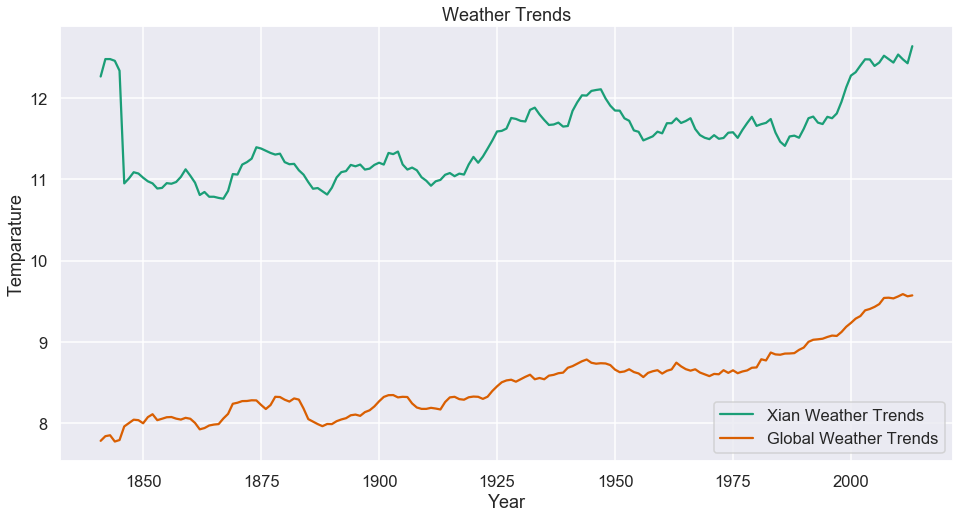

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

fig,ax = plt.subplots(figsize=(16,8))
ax.plot(df['moving_avg_xian'], label='Xian Weather Trends')
ax.plot(df['moving_avg_global'], label='Global Weather Trends')

ax.legend(loc='best')
ax.set_xlabel('Year')
ax.set_ylabel('Temparature')
ax.set_title('Weather Trends')

### Interpretation:
- Xian’s average temperature is higher than global as the green line for Xian is higher; thus Xian is generally hotter.
- The difference of temperature between Xian and global has been consistent over time as the gap between the two lines are similar over most of the period.
- The overall trend for Xian and global are both increasing; both Xian and global are getting hotter.
- There is an exception for the trend. In the earlier few years before 1850, Xian’s temperature was extremely high and then decreased sharply while globe’s temperature is climbing mildly during the period. There maybe some extreme weather in xian during that time, but as the period is relatively short, it does not affect our conclusion for the overall trend.
- The increase rate of the temperature is higher in recent few years for both Xian and global. We can see from the chart, roughly after 1975, both lines are increasing quicker, however xian has higher fluctuation which global temperature is going up more stably. 

## Conclusion
> In this project, I analyzed the weather trend using temperature data for Xi’an and Global from the year 1820 to 2013. We can conclude that Xi'an is a hotter place and has higher fluctuation on the weather compared with global average. However, the temperature for both Xian and global are increasing over years and particularly, it is increasing at higher rate in recent years. Furthermore, based on historical trends, we can predict that the future trend will be continuely increasing at higher rate; Our world is facing climate change and protecting the environment is very important.

>**Further Notes:**
>This project is mainly focused on EDA (Exploratory Data Analysis). To precisely predict the future trends, a robust data prediction model is needed, but this is beyond the purpose of this projects. In my other projects, there will be machine learning, data modeling and predictions. 